In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the main data file
try:
    cars_df = pd.read_csv("source/car_price_prediction.csv")
except FileNotFoundError:
    print("Error Finding the file")

In [3]:
#Preview the dataframe
cars_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
#dataframe Information 
print(f"shape :{cars_df.shape}")
cars_df.info()

shape :(19237, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             192

In [5]:
#Number of null values in each column
cars_df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
#Drop ID column since its not useful
cars_df = cars_df.drop(columns="ID")

In [7]:
cars_df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

In [8]:
cars_df[(cars_df["Levy"] == "-")].Levy.value_counts()

Levy
-    5819
Name: count, dtype: int64

In [9]:
#Clean Levy column
cars_df["Levy"] = pd.to_numeric(cars_df["Levy"], errors="coerce")
cars_df["Levy"] = cars_df["Levy"].fillna(cars_df["Levy"].median())
cars_df["Levy"].isnull().sum()

np.int64(0)

In [10]:
# clean mileage column
cars_df["Mileage"] = cars_df["Mileage"].apply(lambda x: x.replace("km", ""))
cars_df["Mileage"] = pd.to_numeric(cars_df["Mileage"], errors="coerce")

In [11]:
# Information regarding numeric columns
num_data = cars_df.select_dtypes(exclude="object")
num_data.describe()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,868.773353,2010.912824,1.532236e+06,4.582991,6.582627
std,1.905813e+05,390.040440,5.668673,4.840387e+07,1.199933,4.320168
min,1.000000e+00,87.000000,1939.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,730.000000,2009.000000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,781.000000,2012.000000,1.260000e+05,4.000000,6.000000
75%,2.207500e+04,917.000000,2015.000000,1.888880e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,2.147484e+09,16.000000,16.000000


Text(0.5, 1.0, 'Distribution of Price')

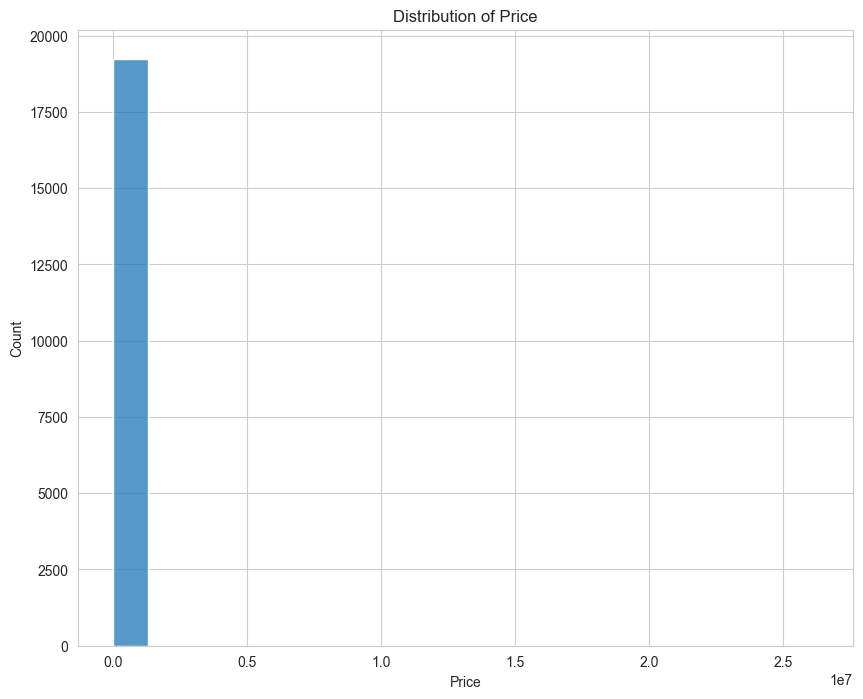

In [12]:
# Create histogram describing price distribution
sns.set_style(style="whitegrid")
plt.figure(figsize=(10,8))
sns.histplot(data=cars_df, x="Price", bins=20)
plt.title("Distribution of Price")

Text(0.5, 1.0, 'Boxplot for price')

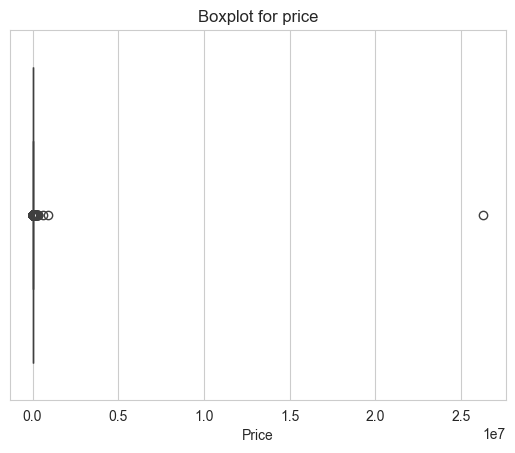

In [13]:
# Bocxplot for price
sns.boxplot(data=cars_df, x="Price")
plt.title("Boxplot for price")

<Axes: >

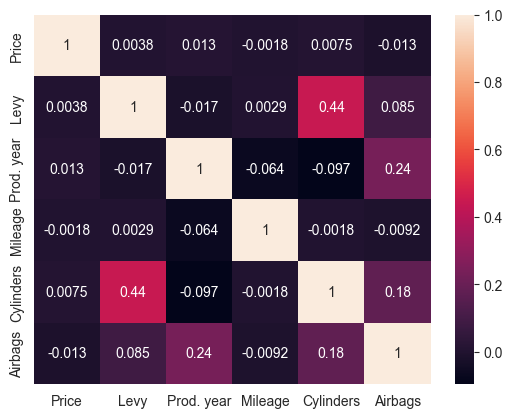

In [14]:
# Data correlation on numeric columns
corr_data = num_data.corr()
sns.heatmap(data=corr_data, annot=True)

In [15]:
categorical_data = cars_df.select_dtypes(include="object")
categorical_data.nunique()

Manufacturer          65
Model               1590
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
dtype: int64

In [16]:
def bar_plot(data, title):
    plt.figure(figsize=(10,8))
    sns.barplot(data=data, orient="h", palette="hls")
    plt.title(f"Avarage price per car based on {title}")
    plt.xlabel(xlabel="Avarage", fontsize=12)
    plt.ylabel(ylabel=f"{title}", fontsize=12)

In [17]:
(cars_df.groupby("Manufacturer").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "Manufacturer")


(Manufacturer
 LAMBORGHINI    872946.00
 BENTLEY        197574.50
 OPEL            73305.62
 FERRARI         66955.50
 LAND ROVER      54053.49
                  ...    
 VAZ              4613.58
 MOSKVICH         4609.00
 ZAZ              3822.50
 ROVER            2433.33
 ROLLS-ROYCE       178.50
 Name: (Price, mean), Length: 65, dtype: float64,
 'Manufacturer')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


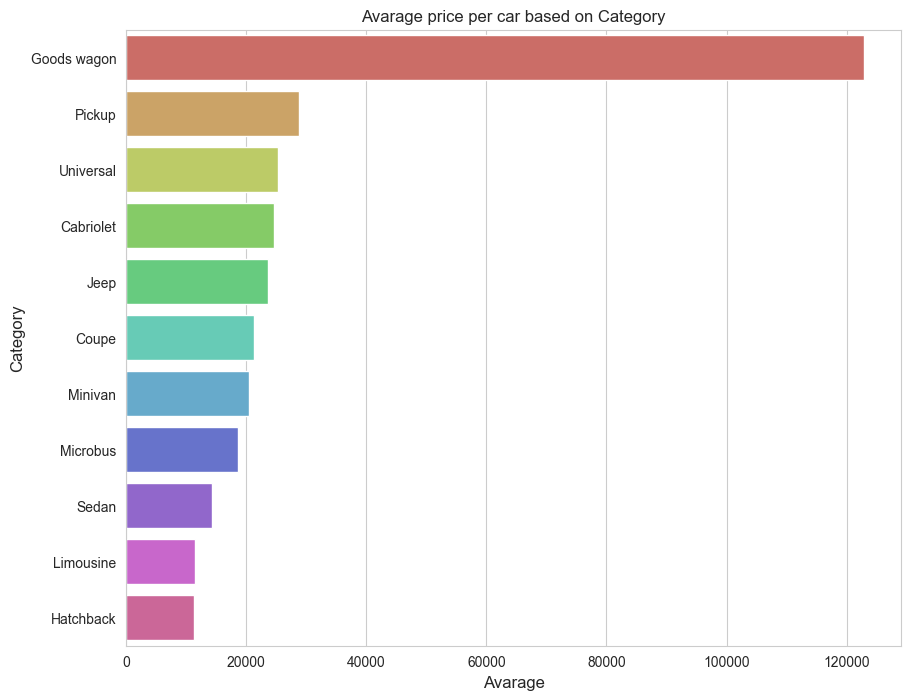

In [18]:
bar_plot(cars_df.groupby("Category").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "Category")


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


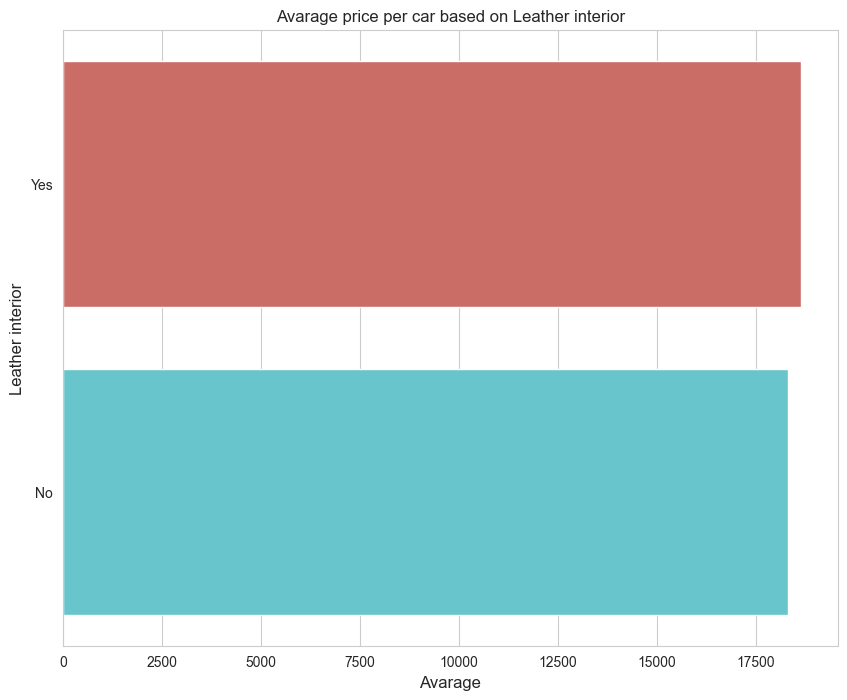

In [19]:
bar_plot(cars_df.groupby("Leather interior").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price", "mean"), ascending=False)[("Price","mean")], "Leather interior")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


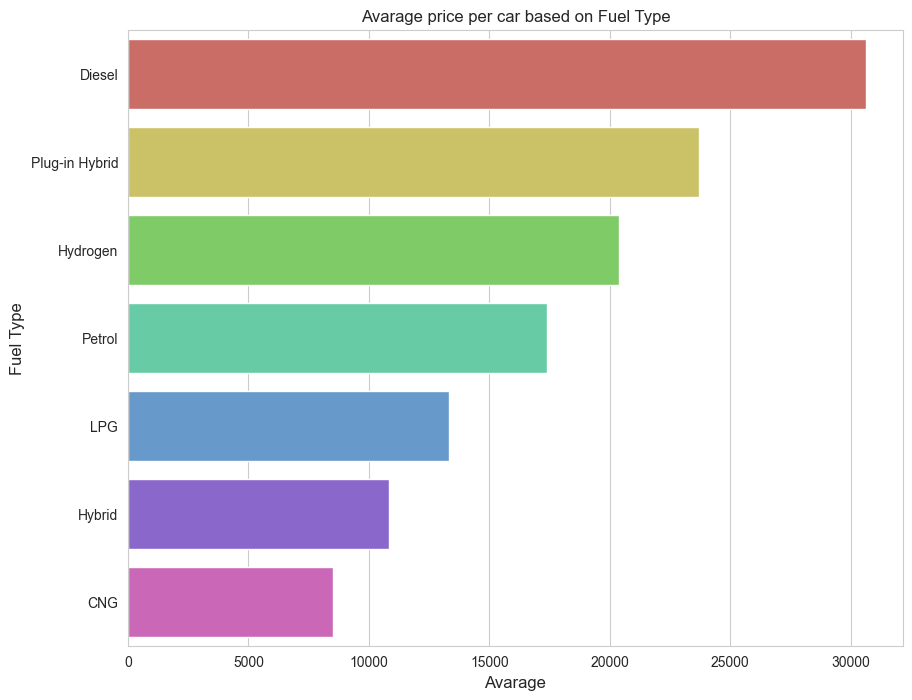

In [20]:
bar_plot(cars_df.groupby("Fuel type").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "Fuel Type")


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


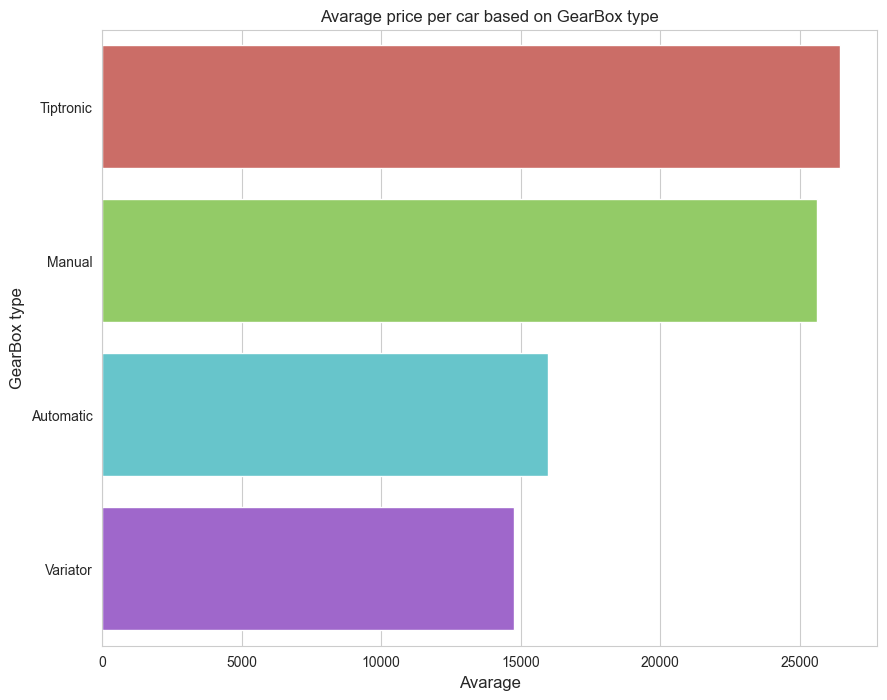

In [21]:
bar_plot(cars_df.groupby("Gear box type").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "GearBox type")


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


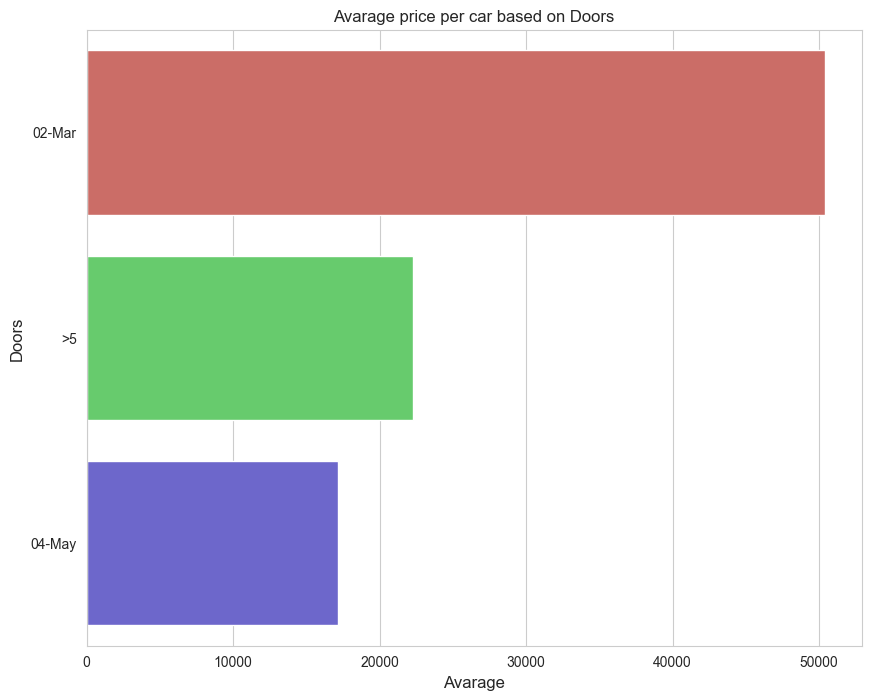

In [22]:
bar_plot(cars_df.groupby("Doors").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "Doors")


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


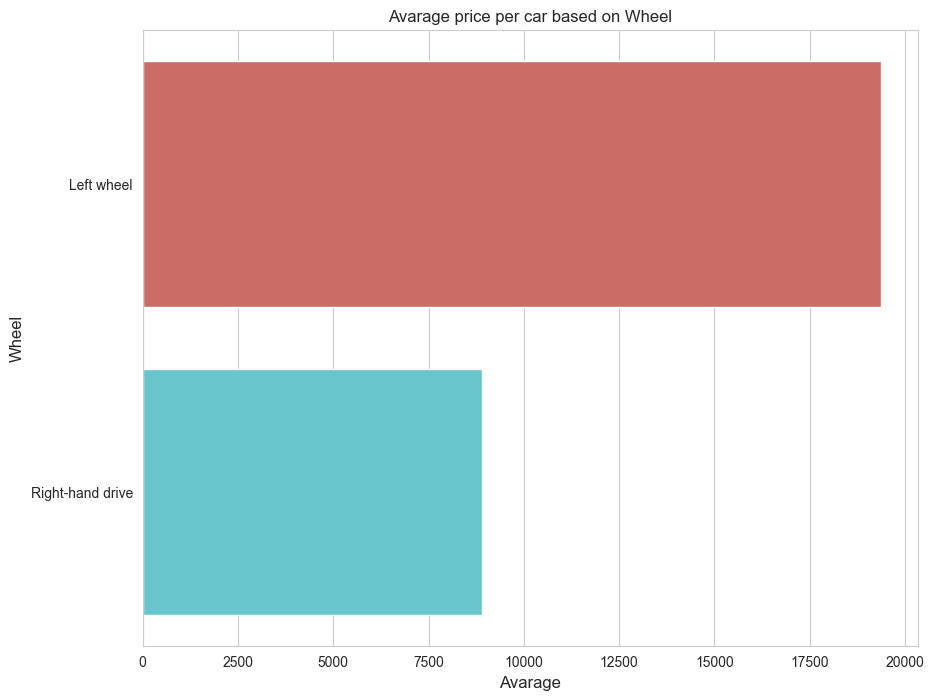

In [23]:
bar_plot(cars_df.groupby("Wheel").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "Wheel")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19216\2986423782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, orient="h", palette="hls")


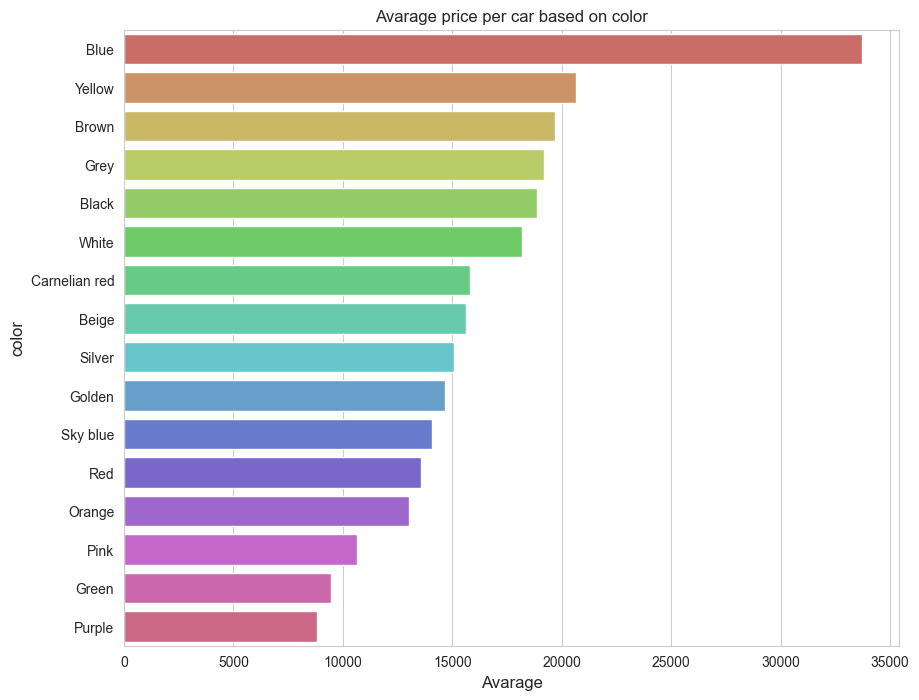

In [27]:
bar_plot(cars_df.groupby("Color").agg({"Price":["mean"]}).astype("float").round(2).sort_values(by=("Price","mean"), ascending=False)[("Price","mean")], "color")


In [24]:
turbo = cars_df["Engine volume"].apply(lambda x: 1 if "Turbo" in x else 0)

In [ ]:
cars_df["Turbo"] = cars_df["Engine volume"].apply(lambda x: "Yes" if "Turbo" in x else "No")
cars_df["Engine volume"] = cars_df["Engine volume"].str.replace("Turbo", "")
cars_df["Engine volume"] = cars_df["Engine volume"].astype("float").round(1)


Text(0.5, 1.0, 'Engine volume distribution')

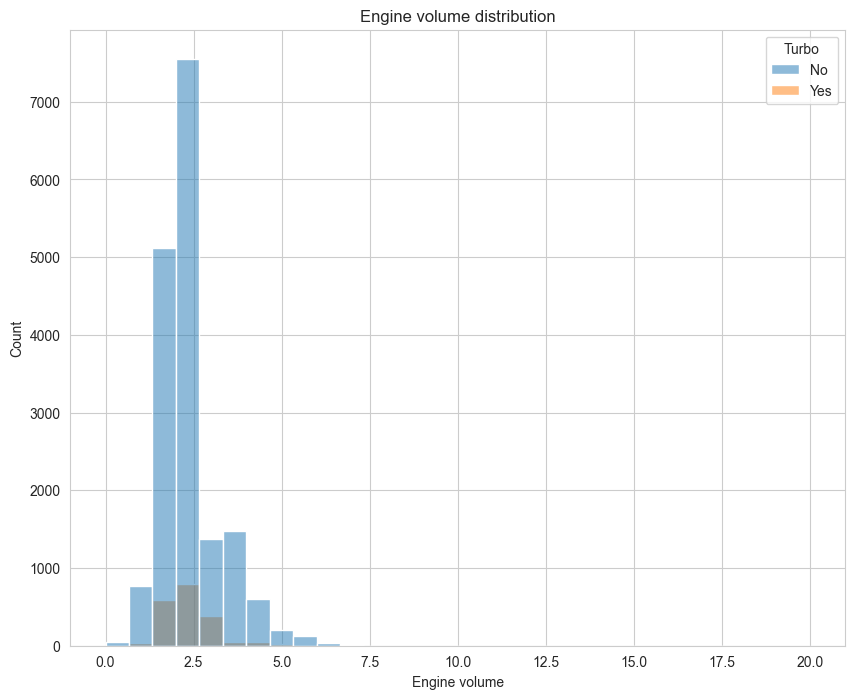

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(data=cars_df, x="Engine volume", hue="Turbo", bins=30)
plt.title("Engine volume distribution")